In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/01_raw/czech_republic.csv")
df.head()

[02/03/25 21:57:34] WARNING  /var/folders/sm/6wwssnjd59v95bx9k441v1900000gn/T/ipykernel_76925/11691 ]8;id=185620;file:///Users/jonas_cristens/.local/share/uv/python/cpython-3.10.15-macos-aarch64-none/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=660328;file:///Users/jonas_cristens/.local/share/uv/python/cpython-3.10.15-macos-aarch64-none/lib/python3.10/warnings.py#109\109]8;;\
                             19370.py:1: DtypeWarning: Columns                                                     
                             (27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,45,46,47,48,50,51,52,                
                             53,55,56,57,63,65,66,123,125,127,132) have mixed types. Specify dtype                 
                             option on import or set low_memory=False.                                             
                               df = pd.read_csv("../data/01_raw/czech_republic.csv")                               
                                                                                                                   

,Unnamed: 0,offer_id,created_date_shp,updated_date_shp,agreement_id_shp,organization_id,sales_id_shp,offer_type_shp,agreement_row_id_shp,gsfa_customer_id,...,competitor_oppo,industry,order_in_oppo,offers_in_oppo,finality,final_outcome,final_discount_shp,revenue_bin,discount_oms,discount_delta
0,0,CZ_O_116569624407,2020-02-17 13:49:28,2024-02-07 16:56:51,CZ_O_116569624407,DHL CZ,ZJAROSOV,Standard GPI Offer,1-295MJL-1123,COMET_1-7IGPWS6,...,NaN,IND:TECH,NaN,NaN,interim,NaN,NaN,low,51.0,14.000000
1,1,CZ_O_117848390072,2020-06-12 08:50:11,2023-05-11 09:44:00,CZ_O_117848390072,DHL CZ,MSUROVCO,Standard GPI Offer,1-1KDKVJ-957,CZC68194,...,NaN,IND:ENGM,NaN,NaN,interim,NaN,NaN,low,40.0,-40.000000
2,2,CZ_O_117848390072,2020-06-12 08:50:11,2023-05-11 09:44:00,CZ_O_117848390072,DHL CZ,MSUROVCO,Standard GPI Offer,1-1KDKVJ-957,CZC68194,...,NaN,IND:ENGM,NaN,NaN,interim,NaN,NaN,low,40.0,-40.000000
3,3,CZ_O_118885941840,2020-09-11 06:51:08,2021-07-09 08:34:50,CZ_O_118885941840,DHL CZ,DSKLENIC,Standard GPI Offer,1-8VWLW8T,COMET_1-JQRYF0,...,NaN,IND:CHEM,NaN,NaN,interim,NaN,NaN,low,50.0,14.998943
4,4,CZ_O_118885941840,2020-09-11 06:51:08,2021-07-09 08:34:50,CZ_O_118885941840,DHL CZ,DSKLENIC,Standard GPI Offer,1-8VWLW8T,COMET_1-JQRYF0,...,NaN,IND:CHEM,NaN,NaN,interim,NaN,NaN,low,75.0,10.000000


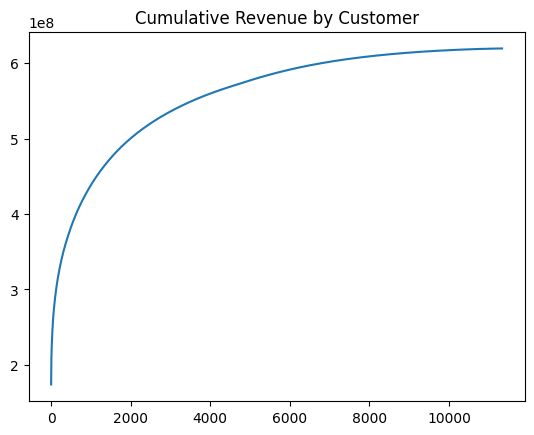

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
df_revenue = df.groupby('gsfa_customer_id')['offer_expected_revenue'].mean().sort_values(ascending=False).cumsum().reset_index(drop=True)
df_revenue.plot.line(title='Cumulative Revenue by Customer')
plt.show()

In [36]:
df_rev = (df_revenue/ df_revenue.iloc[-1]).to_frame()
df_rev = df_rev.rename(columns={'offer_expected_revenue': 'cum_rev_perc'})
df_rev['cum_rev'] = df_revenue
df_rev['share_cust'] = df_rev.index / df_rev.shape[0]
df_rev

,cum_rev_perc,cum_rev,share_cust
0,0.280496,1.738122e+08,0.000000
1,0.294625,1.825674e+08,0.000088
2,0.303944,1.883422e+08,0.000176
3,0.312720,1.937801e+08,0.000265
4,0.320902,1.988501e+08,0.000353
...,...,...,...
11330,1.000000,6.196602e+08,0.999559
11331,1.000000,6.196603e+08,0.999647
11332,1.000000,6.196604e+08,0.999735
11333,1.000000,6.196604e+08,0.999824


Text(0, 0.5, 'Share of Revenue in %')

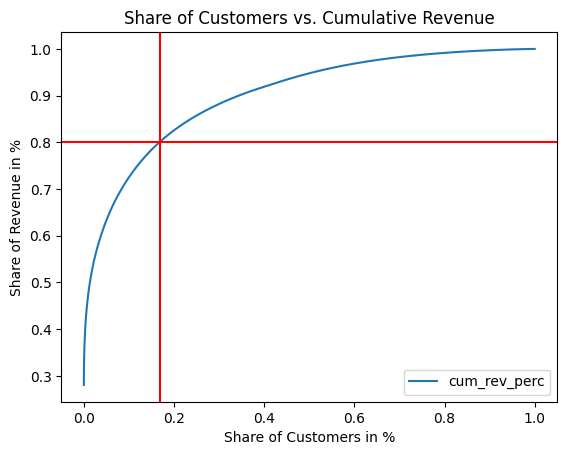

In [56]:
ax = df_rev.plot(x='share_cust', y='cum_rev_perc', title="Share of Customers vs. Cumulative Revenue")
ax.axvline(0.17, color='red')
ax.axhline(0.8, color='red')
ax.set_xlabel("Share of Customers in %")
ax.set_ylabel("Share of Revenue in %")

In [37]:
df_rev[df_rev['cum_rev_perc']>0.8].head(1)

,cum_rev_perc,cum_rev,share_cust
1899,0.800064,4.957678e+08,0.167534
